# **Gold Recovery Predictions at Zyfra IT Solution for Heavy Industries**

# Project Goals

We will encounter a data science problems in gold mining industry. This project is facilitated by [Zyfra](https://www.zyfra.com/).

Set up a machine learning prototype model for Zyfra. The company is engaged in developing efficient solutions for heavy industry.

The model should be able to predict the amount of gold extracted or recovered from gold ore. We have data related to the process of extracting and refined gold ore that you can use.

This model is expected to help to create a more efficient production process and get rid of non-profitable parameters.

We need to:

1. Prepare available data;
2. Carry out data analysis;
3. Develop and train the model.

To complete this project, we will probably need to use the documentation from the Pandas, Matplotlib, and Sklearn libraries.

On the next lesson we will discuss the process of refining gold ore. From there, we will determine what information is needed to develop the model.

# Technology Process

How to extract gold from gold ore? Let's observe the stages of this extraction process.

Mined ore undergoes primary processing to obtain a coarser ore mix or feed. The result of that process is used as feedstock for flotation (a.k.a the process for producing a coarser concentrate). After flotation, the resulting particles also go through a two-stage purification process.

Let's break down the process:

**1. Flotation**
The gold ore mixture is fed into a float tank to obtain Au concentrate and coarser tails (residue products with low concentrations of precious metals).
The stability of this process is affected by the volatility and non-optimal physicochemical state of the flotation pulp (a mixture of solid and liquid particles).

**2. Purification**
Coarse Au concentrates undergo two stages of purification. After the refining process, we will also have a new level of final metal concentration and tail.

# Data Description

**Technological Process**

- Rougher feed — raw material for flotation process
- Rougher additions (or reagent additions) — reagents for flotation: Xanthate, Sulphate, Depressant
   - Xanthate — flotation activator or activator
   - Sulphate — sodium sulfide, specifically for this process
   - Depressant — sodium silicate
- Rougher process — flotation
- Rougher tails — product residue
- Float banks — flotation units
- Cleaner process — purification
- Rougher Au — coarser gold concentrate
- Final Au — final gold concentrate

**Parameters of Available Stages**

- air amount — air volume
- fluid levels
- feed size — the size of the feed particles
- feed rate

# Feature Naming

Here's how to give names to existing features:

`[stage].[parameter_type].[parameter_name]`

Example: `rougher.input.feed_ag`

Possible values for `[stage]`:

- rougher — flotation
- primary_cleaner — first purification
- secondary_cleaner — second purification
- final — final characteristics

Possible values for `[parameter_type]`:

- input — raw material parameters
- output — product parameters
- state — a parameter indicating the characteristics of the current stage
- calculation — characteristic calculation

# Calculations for Gain

We need to simulate the process of the obtained gold from gold ore.

Use the following formula to simulate the acquisition process:

With:

- C — percentage of gold in the concentrate right after the flotation process (to find the coarser concentrate obtained)/after refining (to find the final concentrate recovery)
- F — percentage of gold in the feed before the flotation process (to find the coarser concentrate gain)/ in the concentrate right after the flotation process (to find the final concentrate gain)
- T — percentage of gold in the coarser tails, right after the flotation process (to find the coarser concentrate gain)/after refining (to find the final concentrate gain)

To predict the coefficient, you need to find the percentage of gold in the concentrate and tails. Remember that both the final concentrate and the coarser concentrate are equally important.

**Evaluation Metrics**

To solve the existing problem, we will need a new metric. The metric is called **sMAPE** (symmetric Mean Absolute Percentage Error), or symmetric mean absolute percentage error.

sMAPE is similar to MAE, except that sMAPE is expressed in relative values, not absolute values. Why is this metric called symmetric? Because sMAPE takes into account both target and prediction scales.
Here's how to calculate sMAPE:

where:

- Target values for observations with index i in the set used to measure quality.

- The predicted value for an observation with index i, for example, in a test sample.

- The number of observations on the sample.

- Sum of all sample observations (i values are 0 to N).

We need to predict two values:

- Coarse concentrate gain `rougher.output.recovery`
- Obtain final concentrate `final.output.recovery`

The last metric includes two values:

# Project Description

The data you need is stored in three files:

- `gold_recovery_train.csv` — training dataset
- `gold_recovery_test.csv` — test dataset
- `gold_recovery_full.csv` — the source dataset

This data is indexed according to the date and time of acquisition (date feature). Regarding time, parameters that are located next to each other are generally similar.

Some parameters are not available because their measurements and/or calculations are carried out much later. That is why, some features that are in the training set may not be in the test set. The test set also does not contain the target.

The source dataset contains the training and test sets with all their features.

Remember, the data you have is raw data that has just been downloaded from the data warehouse. Before we build a model, check the accuracy of the data.


#Project Instructions

**1. Prepare the data**

1.1. Open the file and explore the data.
file paths:

- `/content/gold_recovery_train.csv`
- `/content/gold_recovery_test.csv`
- `/content/gold_recovery_full.csv`

1.2. Check if the gold gain has been calculated correctly. Using the training set, calculate the gain for the rougher.output.recovery feature. Find the MAE between the calculation and the feature value.

1.3. Analyze all features that are not available in the test set. What are these parameters? What type are these parameters?

1.4. Perform data pre-processing.

**2. Analyze the data**

2.1. Create notes on how the concentration of metals (Au, Ag, Pb) changes depending on the stage of purification.

2.2. Compare the particle size distribution of the feed in the training set and in the test set. If the distribution were varies significantly, the evaluation of the model will be invalid.

2.3. Consider the total concentrations of all substances at different stages: raw feed, coarser concentrations, and final concentrations. Do you notice any abnormal values in the distribution of the totals? If yes, is it necessary to remove those values from both samples? Describe what you found and remove the anomaly.

2.4 Fill the missing value

**3. Create the model**

3.1. Create a function that is used to calculate the final sMAPE value.

3.2. Conduct training on different models. Evaluate these models using cross-validation. Choose the best model and test the model using a test sample.


# **1. Prepare the data**

1.1. Open the file and explore the data.
file paths:

- `/content/gold_recovery_train.csv`
- `/content/gold_recovery_test.csv`
- `/content/gold_recovery_full.csv`

1.2. Check if the gold gain has been calculated correctly. Using the training set, calculate the gain for the rougher.output.recovery feature. Find the MAE between the calculation and the feature value.

1.3. Analyze all features that are not available in the test set. What are these parameters? What type are these parameters?

1.4. Perform data pre-processing.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

**1.1. Open the file and explore the data.**

In [ ]:
df_train = pd.read_csv('/content/gold_recovery_train.csv', parse_dates=True)
df_test = pd.read_csv('/content/gold_recovery_test.csv', parse_dates=True)
df_full = pd.read_csv('/content/gold_recovery_full.csv', parse_dates=True) #combined from df_train and df_test

In [ ]:
df_train.shape, df_test.shape, df_full.shape

((16860, 87), (5856, 53), (22716, 87))

In [ ]:
df_full[:2]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.49

In [ ]:
df_full[df_full['date'].isin(df_train['date'])].shape

(16860, 87)

In [ ]:
df_full[df_full['date'].isin(df_test['date'])].shape

(5856, 87)

In [ ]:
df_full[df_full['date']=='2016-09-01 00:59:59']

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,210.800909,14.993118,8.08,1.005021,11.63191,12.706851,17.872038,28.364867,17.266279,4.148198,11.034524,6.587571,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,35236.090448,2173.703032,2102.438804,2.143822,13.128569,5.63671,489.793655,62.710452,42.02244,12.084103,16.922877,6.153479,16.867518,6.150709,15.734654,8.227045,33.791932,22.186207,89.993421,5.936471,0.747425,14.787965,2.371757,1001.849317,-350.301265,1249.738612,-399.107531,1249.75052,-399.39673,1198.287855,-399.488594,999.47225,-399.530962,949.566189,-398.180807,16.484844,4.4136,12.034406,5.560988,24.9382,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


In [ ]:
df_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


**1.2. Check if the gold gain has been calculated correctly. Using the training set, calculate the gain for the rougher.output.recovery feature. Find the MAE between the calculation and the feature value.**

In [ ]:
# Check the formula: whether the gold gain has been calculated correctly
# Formula: Calculation for Gain
def recovery_calc(row):
    numerator = row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au'])
    denominator = row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au'])
    return numerator/denominator*100

In [ ]:
df_formula = df_train.copy()

In [ ]:
df_formula[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [ ]:
df_formula['numerator'] = df_formula['rougher.output.concentrate_au']*(df_formula['rougher.input.feed_au']-df_formula['rougher.output.tail_au'])
df_formula['denominator'] = df_formula['rougher.input.feed_au']*(df_formula['rougher.output.concentrate_au']-df_formula['rougher.output.tail_au'])

In [ ]:
df_formula[['numerator', 'denominator']].isnull().sum()

numerator      2250
denominator    2250
dtype: int64

In [ ]:
#fill in the blank numerator and denominator with values
df_formula['numerator'] = df_formula['numerator'].fillna(0)
df_formula['denominator'] = df_formula['denominator'].fillna(1)

In [ ]:
df_formula['formula'] = df_formula['numerator'] / df_formula['denominator'] * 100

In [ ]:
answer = (df_formula['formula'] - df_formula['rougher.output.recovery']).abs().mean() #calculate the differences

print('The difference betweem expected value and measured value is {}'.format(answer))

Perbedaan antara expected value dan measured value adalah 9.303415616264301e-15


**Conclusion**

The difference is very small, only 9.303415616264301e-15

**1.3. Analyze all features that are not available in the test set. What are these parameters? What type are these parameters?**

In [ ]:
missed_test_columns = set(list(df_train.columns.values))-set(list(df_test.columns.values))

In [ ]:
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [ ]:
df_full[missed_test_columns]

,rougher.output.tail_ag,final.output.tail_au,final.output.concentrate_au,secondary_cleaner.output.tail_sol,final.output.tail_sol,primary_cleaner.output.tail_pb,final.output.concentrate_pb,final.output.tail_ag,final.output.concentrate_ag,final.output.concentrate_sol,rougher.output.concentrate_pb,primary_cleaner.output.tail_ag,rougher.output.tail_pb,primary_cleaner.output.concentrate_ag,final.output.recovery,primary_cleaner.output.concentrate_pb,secondary_cleaner.output.tail_pb,primary_cleaner.output.tail_au,rougher.output.recovery,rougher.output.concentrate_au,rougher.calculation.floatbank10_sulfate_to_au_feed,primary_cleaner.output.tail_sol,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.tail_sol,final.output.tail_pb,rougher.output.tail_au,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_sol,rougher.calculation.au_pb_ratio,secondary_cleaner.output.tail_ag,rougher.calculation.sulfate_to_au_concentrate,secondary_cleaner.output.tail_au
0,5.008018,2.143149,42.192020,8.764648,16.904297,2.534912,9.889648,10.411962,6.055403,5.507324,7.101074,14.936526,0.508728,8.547551,70.541216,10.389648,4.694824,2.106679,87.107763,19.793808,3481.779053,7.476074,3520.337158,28.029297,34.174427,19.154297,0.895447,1.170244,11.500771,19.529297,2.838687,14.500184,41885.707031,2.606185
1,4.955378,2.224930,42.701629,9.001494,16.634514,3.049646,9.968944,10.462676,6.029369,5.257781,7.278807,16.250511,0.536689,8.558743,69.266198,10.497069,4.592547,2.353017,86.843261,20.050975,3498.370979,6.733907,3489.981857,28.067063,34.118526,18.965234,0.927452,1.184827,11.615865,19.369147,2.858998,14.265474,42050.861809,2.488248
2,4.843460,2.257889,42.657501,8.842896,16.208849,3.124664,10.213995,10.507046,6.055926,5.383759,7.216833,16.491823,0.546416,8.603505,68.116445,10.354494,4.624775,2.416800,86.842308,19.737170,3495.348910,6.471768,3502.359819,27.454037,33.969464,18.808533,0.953716,1.162562,11.695753,19.167579,2.945989,14.115662,42018.101184,2.458187
3,4.655288,2.146849,42.689819,9.122857,16.532835,2.960362,9.977019,10.422762,6.047977,4.858634,7.175616,16.024359,0.542525,7.221879,68.347543,8.496563,4.482453,2.262051,87.226430,19.320810,3498.578313,6.843791,3499.162912,27.341277,28.260743,19.330200,0.883763,1.079755,11.915047,15.978538,3.002340,13.732071,42029.447991,2.322062
4,4.552800,2.055292,42.774141,8.871028,16.525686,3.112100,10.142511,10.360302,6.148599,4.939416,7.240205,16.480185,0.515438,9.089428,66.927016,9.986786,4.470737,2.277073,86.688794,19.216101,3494.800771,6.550154,3506.679315,27.041023,33.044932,19.267422,0.792826,1.012642,12.411054,19.199864,3.169615,14.079996,42125.354245,2.330448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,4.207261,1.529220,46.713954,0.000000,10.403181,6.531541,11.356233,8.769645,3.224920,6.803482,10.984003,22.854592,0.612935,6.559174,73.755150,12.445966,0.000000,2.314352,89.574376,18.603550,2497.652954,3.934320,2499.177950,30.068876,32.940215,16.666590,3.141541,0.748633,11.124896,7.056338,1.155559,0.000000,45912.942619,0.000000
22712,4.177943,1.612542,46.866780,0.000000,10.549470,6.629725,11.349355,8.897321,3.195978,6.862249,10.888213,23.002490,0.650557,6.612376,69.049291,12.623947,0.000000,2.462890,87.724007,18.441436,2614.403937,4.089124,2518.550078,29.783972,32.925325,16.960649,3.130493,0.771582,11.425983,7.542264,1.167342,0.000000,46200.099585,0.000000
22713,4.050010,1.596616,46.795691,0.000000,11.115147,6.278250,11.434366,8.529606,3.109998,6.886013,8.955135,22.298149,0.636095,7.128896,67.002189,12.633558,0.000000,2.612231,88.890579,15.111231,2510.813545,4.457457,2510.142433,22.786467,31.856742,18.323080,2.911418,0.685059,8.523497,7.941900,1.125637,0.000000,44585.181334,0.000000
22714,3.902494,1.602879,46.408188,0.000000,10.463847,6.253145,11.625587,8.777171,3.367241,6.799433,10.655377,22.714656,0.625609,7.490444,65.523246,

In [ ]:
df_full[missed_test_columns].dtypes

rougher.output.tail_ag                                float64
final.output.tail_au                                  float64
final.output.concentrate_au                           float64
secondary_cleaner.output.tail_sol                     float64
final.output.tail_sol                                 float64
primary_cleaner.output.tail_pb                        float64
final.output.concentrate_pb                           float64
final.output.tail_ag                                  float64
final.output.concentrate_ag                           float64
final.output.concentrate_sol                          float64
rougher.output.concentrate_pb                         float64
primary_cleaner.output.tail_ag                        float64
rougher.output.tail_pb                                float64
primary_cleaner.output.concentrate_ag                 float64
final.output.recovery                                 float64
primary_cleaner.output.concentrate_pb                 float64
secondar

**Conclusion**

There are 34 columns with missing values, all of them have **float64** data type. In the `final.output.recovery` column which is our target, there is some missing values

**1.4. Perform data pre-processing.**

In [ ]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [ ]:
df_full.isnull().mean().sort_values(ascending=False)

rougher.output.recovery                     0.137304
rougher.output.tail_ag                      0.120488
rougher.output.tail_au                      0.120444
rougher.output.tail_sol                     0.120444
rougher.input.floatbank11_xanthate          0.099357
                                              ...   
primary_cleaner.state.floatbank8_b_level    0.001893
primary_cleaner.state.floatbank8_c_level    0.001893
primary_cleaner.state.floatbank8_d_level    0.001893
primary_cleaner.input.feed_size             0.000000
date                                        0.000000
Length: 87, dtype: float64

In [ ]:
df_train.isnull().mean().sort_values(ascending=False).head(10)

rougher.output.recovery               0.152610
rougher.output.tail_ag                0.133452
rougher.output.tail_sol               0.133393
rougher.output.tail_au                0.133393
secondary_cleaner.output.tail_sol     0.117794
rougher.input.floatbank11_xanthate    0.112930
final.output.recovery                 0.090214
primary_cleaner.input.sulfate         0.077521
primary_cleaner.input.depressant      0.074852
rougher.calculation.au_pb_ratio       0.073665
dtype: float64

In [ ]:
df_test.isnull().mean().sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          0.060280
primary_cleaner.input.sulfate               0.051571
primary_cleaner.input.depressant            0.048497
rougher.input.floatbank10_sulfate           0.043887
primary_cleaner.input.xanthate              0.028347
rougher.input.floatbank10_xanthate          0.021004
rougher.input.feed_sol                      0.011441
rougher.input.floatbank11_sulfate           0.009392
rougher.input.feed_rate                     0.006831
secondary_cleaner.state.floatbank3_a_air    0.005806
dtype: float64

**Conclusion**

There is so many missing values in each dataset, we will fill in the values in the next stage

# **2. Analyze the data**

2.1. Create notes on how the concentration of metals (Au, Ag, Pb) changes depending on the stage of purification.

2.2. Compare the particle size distribution of the feed in the training set and in the test set. If the distribution were varies significantly, the evaluation of the model will be invalid.

2.3. Consider the total concentrations of all substances at different stages: raw feed, coarser concentrations, and final concentrations. Do you notice any abnormal values in the distribution of the totals? If yes, is it necessary to remove those values from both samples? Describe what you found and remove the anomaly.

2.4 Fill the missing value

**2.1. Create notes on how the concentration of metals (Au, Ag, Pb) changes depending on the stage of purification.**

In [ ]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        df_full[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)

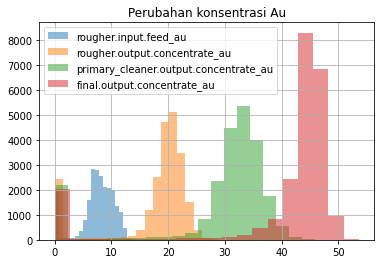

In [ ]:
plot_concentrate_progress('au')
plt.title('Perubahan konsentrasi Au');

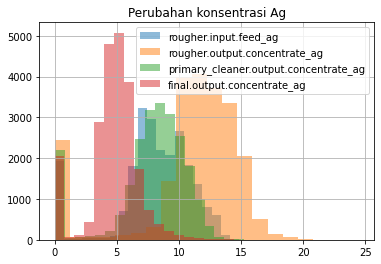

In [ ]:
plot_concentrate_progress('ag')
plt.title('Perubahan konsentrasi Ag');

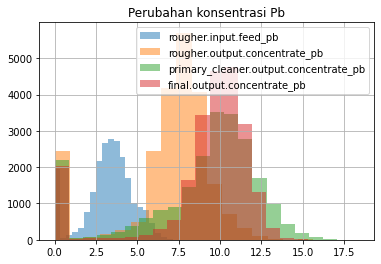

In [ ]:
plot_concentrate_progress('pb')
plt.title('Perubahan konsentrasi Pb');

**Conclusion**

Based on the histogram, for `Au` the concentration changes look different. Meanwhile, for `Ag` and `Pb`, it can be seen that the changes overlap with other concentrates

**2.2. Compare the particle size distribution of the feed in the training set and in the test set. If the distribution were varies significantly, the evaluation of the model will be invalid.**

In [ ]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature):
    filter_outliers(df_train[feature]).plot.kde()
    filter_outliers(df_test[feature]).plot.kde()
    plt.legend(['train', 'test'])

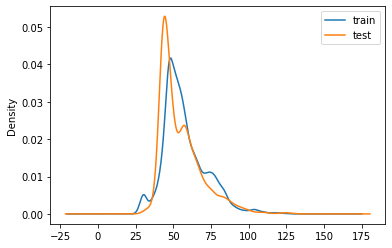

In [ ]:
compare_train_test_feature('rougher.input.feed_size')

<AxesSubplot:ylabel='Density'>

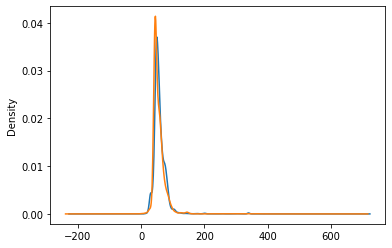

In [ ]:
df_train['rougher.input.feed_size'].plot.kde()
df_test['rougher.input.feed_size'].plot.kde()

**Conclusion**

Based on the chart above, whether using outliers filter or not, it can be concluded that the particle size distribution of the feed in the training set and test set is more or less has similar value

**2.3. Consider the total concentrations of all substances at different stages: raw feed, coarser concentrations, and final concentrations. Do you notice any abnormal values in the distribution of the totals? If yes, is it necessary to remove those values from both samples? Describe what you found and remove the anomaly.**

# **Feature Selection**

In [ ]:
# search column that has a strong correlation with rougher.output.recovery column
df_full.corr()['rougher.output.recovery'][df_full.corr()['rougher.output.recovery'] > 0.5]

rougher.output.concentrate_ag     0.654141
rougher.output.concentrate_pb     0.555882
rougher.output.concentrate_sol    0.612460
rougher.output.concentrate_au     0.588931
rougher.output.recovery           1.000000
Name: rougher.output.recovery, dtype: float64

<AxesSubplot:>

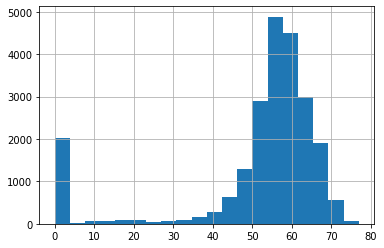

In [ ]:
features_input_concentrate = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

df_full[features_input_concentrate].sum(1).hist(bins=20)

<AxesSubplot:>

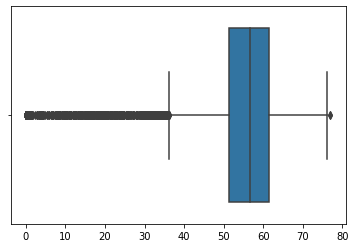

In [ ]:
sns.boxplot(df_full[features_input_concentrate].sum(1))

<AxesSubplot:>

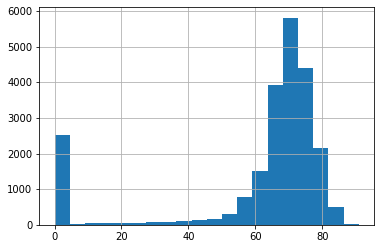

In [ ]:
features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

df_full[features_rough_concentrate].sum(1).hist(bins=20)

<AxesSubplot:>

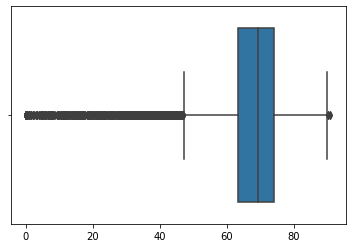

In [ ]:
sns.boxplot(df_full[features_rough_concentrate].sum(1))

<AxesSubplot:>

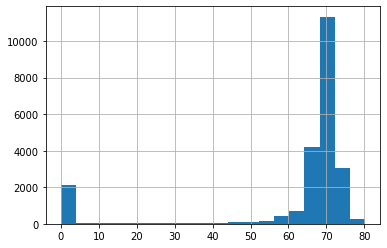

In [ ]:
features_final_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]

df_full[features_final_concentrate].sum(1).hist(bins=20)

<AxesSubplot:>

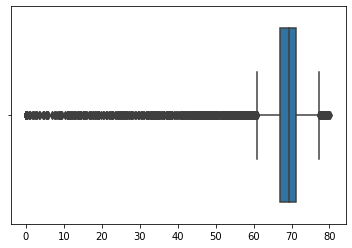

In [ ]:
sns.boxplot(df_full[features_final_concentrate].sum(1))

In [ ]:
THRESHOLD = 0.1 #to filter excluding a 0 value

df_train = df_train[df_train[features_input_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_rough_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_final_concentrate].sum(1) > THRESHOLD]

print(df_train.shape)

df_full_test = df_full[df_full['date'].isin(df_test['date'])].reset_index(drop=True)
df_test = df_test[df_full_test[features_input_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_rough_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_final_concentrate].sum(1) > THRESHOLD]

print(df_test.shape)

(14601, 87)
(5277, 53)


**2.4 Fill the missing value**

In [ ]:
columns_used = df_test.columns.values.tolist()
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')

In [ ]:
df_train_fixed = df_train[columns_used]

In [ ]:
df_train_fixed = df_train_fixed[df_train_fixed['rougher.output.recovery'].notnull()].reset_index(drop=True)
df_train_fixed = df_train_fixed[df_train_fixed['final.output.recovery'].notnull()].reset_index(drop=True)

In [ ]:
df_train_fixed.shape, df_test.shape # the total column from train set and test set must be matched for machine learning

((13789, 55), (5277, 53))

In [ ]:
df_full_fixed = pd.concat([df_train_fixed, df_test])

In [ ]:
df_full_fixed.isnull().mean().sort_values(ascending=False)

final.output.recovery                         0.276775
rougher.output.recovery                       0.276775
rougher.input.floatbank11_xanthate            0.022186
rougher.state.floatbank10_e_air               0.019564
secondary_cleaner.state.floatbank2_a_air      0.011329
rougher.input.feed_size                       0.007343
rougher.input.feed_pb                         0.005245
rougher.input.feed_sol                        0.005192
primary_cleaner.input.xanthate                0.005088
rougher.input.floatbank10_sulfate             0.001836
rougher.input.floatbank11_sulfate             0.001678
primary_cleaner.input.depressant              0.001521
primary_cleaner.input.sulfate                 0.001101
secondary_cleaner.state.floatbank2_b_air      0.001049
rougher.input.feed_rate                       0.000734
secondary_cleaner.state.floatbank3_a_air      0.000629
rougher.input.floatbank10_xanthate            0.000420
secondary_cleaner.state.floatbank4_a_air      0.000210
primary_cl

In [ ]:
#fill the missing value with median on the target 2:-2
for cols in df_full_fixed.isnull().mean().sort_values(ascending=False)[2:-2].index:
    median_cols = df_full_fixed[cols].median()
    df_full_fixed[cols] = df_full_fixed[cols].fillna(median_cols)

In [ ]:
df_test_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].isnull()]
df_test_final = df_test_final.drop(columns=['rougher.output.recovery', 'final.output.recovery'])

df_train_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].notnull()].reset_index(drop=True)

In [ ]:
df_train_final.shape, df_test_final.shape

((13789, 55), (5277, 53))

In [ ]:
df_train_final.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

**Conclusion**

The blank value no longer exists. However, the number of columns remains the same, because the possible median values are different between the train and test datasets

# **3. Create the model**

3.1. Create a function that is used to calculate the final sMAPE value.

3.2. Conduct training on different models. Evaluate these models using cross-validation. Choose the best model and test the model using a test sample.

In [ ]:
features = df_test_final.drop(columns=['date']).columns.values #drop date column
targets = ['rougher.output.recovery', 'final.output.recovery']

In [ ]:
features_train = df_train_final[features].reset_index(drop=True)
target_train = df_train_final[targets].reset_index(drop=True)
target_train.columns = [0, 1]

In [ ]:
target_train.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [ ]:
features_test = df_test_final[features].reset_index(drop=True)

In [ ]:
target_test = df_full[df_full['date'].isin(df_test_final['date'])][targets].reset_index(drop=True)

In [ ]:
target_test.columns = [0, 1]

In [ ]:
target_test

,0,1
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5272,95.172585,68.919891
5273,94.575036,68.440582
5274,93.018138,67.092759
5275,92.599042,68.061186


**3.1. Create a function that is used to calculate the final sMAPE value.**

In [ ]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2

    return (error / scale).mean() * 100

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])

    return 0.25 * rougher * 0.75 * final

**Baseline**

In [ ]:
#train baseline were used median value
pred_median = target_train.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_train, pred_median))

#test baseline were used median value
pred_median = target_test.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_test, pred_median))

13.881015644772942
7.656566582040699


**Conclusion**

In the train dataset we have a median value of 13.88, and in the test dataset we get a median value of 7.65

**3.2. Conduct training on different models. Evaluate these models using cross-validation. Choose the best model and test the model using a test sample.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [ ]:
#Cross validation function with 4x
def score_model(model, cv=4):
    scores = []

    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):

        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)

        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)

        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))

        scores.append(smape_weighted(target_valid, pred_valid))

    return pd.Series(scores).mean()

In [ ]:
model = LinearRegression()
lr_score = score_model(model)
print("LR:", lr_score)

LR: 16.453158135622388


In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [ ]:
model.predict(features_test)

array([[89.18369448, 73.01298674],
       [88.99518948, 72.62792977],
       [89.25734218, 73.24235492],
       ...,
       [93.12121614, 76.46685045],
       [94.2413852 , 73.66332613],
       [92.87404071, 74.61500735]])

In [ ]:
%%time

for depth in range(1, 5):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=12345)
    score = score_model(model)
    print("RF, depth=", depth, "score=", score)

RF, depth= 1 score= 17.49967736246984
RF, depth= 2 score= 16.46199065638752
RF, depth= 3 score= 14.851300740438067
RF, depth= 4 score= 14.557950369802207
CPU times: user 1min 43s, sys: 0 ns, total: 1min 43s
Wall time: 1min 43s


**Test Set**

In [ ]:
%%time

model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=12345)
model.fit(features_train, target_train)

pred = pd.DataFrame(model.predict(features_train))
print("train:", smape_weighted(target_train, pred))

pred = pd.DataFrame(model.predict(features_test))
print("test:", smape_weighted(target_test, pred))

train: 6.91819953528948
test: 8.04202153269491
CPU times: user 13.7 s, sys: 0 ns, total: 13.7 s
Wall time: 13.7 s


# 4. Final Conclusion

Based on the dataset we used, we have 3 datasets, as below:
- `gold_recovery_train.csv`
- `gold_recovery_test.csv`
- `gold_recovery_full.csv`

The full dataset is a combined train and test dataset, this full dataset has 87 columns and 22716 rows of data. In this case, we carry out an analysis using a machine learning model to help Zyfra find solutions to overcome their problems. After we check the dataset that has been given, then we analyze the data, to see the particle size distribution of the bait in the training set and test set.

Next stage, we perform a feature selection to consider the total concentration of all substances (input, rough, and final). Because there is some missing values, we fill in using median value.

And then, we continue to calculate the final sMAPE value. The value we obtained on the train data is 13.88, then on the test data is 7.65

After calculating the final SMAPE score. We will train the model using cross validation with **Linear Regression**, the result is 16.45. Then, we use cross validation with the **Random Forest Regressor**, the best results we have obtained were at depth 4 which is 14.55

In the final test, we use the **Random Forest Regressor** model with depth 4 on the test dataset using the final SMAPE. The result we've obtained is 8.04

It can be concluded that our test already completed